<a href="https://colab.research.google.com/github/PosgradoMNA/actividades-de-aprendizaje-dsercam/blob/main/ActividadSemana6A01182676.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

#**<font color="darkblue">Actividad Semanal 6 - Visualización</font>**
##**<font color="darkorange"> Transformación y reducción de dimensiones</font>**

###**Maestría en Inteligencia Artificial Aplicada**
###**Curso: Ciencia y analítica de datos**
####**Tecnológico de Monterrey**
#####**Prof: María de la Paz Rico Fernández**

###**<font color="darkgray">Nombre del estudiante: Dante Rodrigo Serna Camarillo</font>**
###**<font color="darkgray">Matrícula: A01182676</font>**

####**<font color="darkorange"> Github URL: </font>**

### <b><font color="darkpurple">Punto 1 - Carga de datos</font></b>


In [26]:
# Get the CSV to perform some examples
import pandas as pd 
import numpy as np
csv_path = 'https://raw.githubusercontent.com/PosgradoMNA/Actividades_Aprendizaje-/main/default%20of%20credit%20card%20clients.csv'
masterDataFrame = pd.read_csv(csv_path, skipinitialspace=True)
masterDataFrame.head(5)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


### <b><font color="darkpurple">Punto 2 - Obten la información del DataFrame</font></b>
Usa los métodos y propiedades: shape, columns, head(), dtypes, info(), isna()

In [2]:
masterDataFrame.shape

(30000, 25)

Esto quiere decir que nuestro data set tiene 30k registros y 25 columnas, donde 1 columna es el ID, 23 columnas pertenecen a features y una columna a nuestra variable de salida.

In [3]:
masterDataFrame.columns

Index(['ID', 'X1', 'X2', 'X3', 'X4', 'X5', 'X6', 'X7', 'X8', 'X9', 'X10',
       'X11', 'X12', 'X13', 'X14', 'X15', 'X16', 'X17', 'X18', 'X19', 'X20',
       'X21', 'X22', 'X23', 'Y'],
      dtype='object')

El método columns nos despliea el header/nombre de nuestras columnas.

In [5]:
#el metodo head nos mostrara 'n' muestras de nuestro set, donde el default son 5 instancias, pero podemos especificar el número de instancias enviandolo como parámetro al método.
masterDataFrame.head()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0
3,4,50000,2.0,2.0,1.0,37.0,0.0,0.0,0.0,0.0,...,28314.0,28959.0,29547.0,2000.0,2019.0,1200.0,1100.0,1069.0,1000.0,0.0
4,5,50000,1.0,2.0,1.0,57.0,-1.0,0.0,-1.0,0.0,...,20940.0,19146.0,19131.0,2000.0,36681.0,10000.0,9000.0,689.0,679.0,0.0


In [6]:
#mostremos por ejemplo, 3 filas en lugar de 5
masterDataFrame.head(3)

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,1,20000,2.0,2.0,1.0,24.0,2.0,2.0,-1.0,-1.0,...,0.0,0.0,0.0,0.0,689.0,0.0,0.0,0.0,0.0,1.0
1,2,120000,2.0,2.0,2.0,26.0,-1.0,2.0,0.0,0.0,...,3272.0,3455.0,3261.0,0.0,1000.0,1000.0,1000.0,0.0,2000.0,1.0
2,3,90000,2.0,2.0,2.0,34.0,0.0,0.0,0.0,0.0,...,14331.0,14948.0,15549.0,1518.0,1500.0,1000.0,1000.0,1000.0,5000.0,0.0


In [7]:
# el metodo dtypes() nos listara el tipo de variable que se le ha asignado a cada feature, 
# como primer punto esto nos ayudaría a determinar si hace falta reasignar un tipo a algun feature debido a la natrualeza de los datos
masterDataFrame.dtypes

ID       int64
X1       int64
X2     float64
X3     float64
X4     float64
X5     float64
X6     float64
X7     float64
X8     float64
X9     float64
X10    float64
X11    float64
X12    float64
X13    float64
X14    float64
X15    float64
X16    float64
X17    float64
X18    float64
X19    float64
X20    float64
X21    float64
X22    float64
X23    float64
Y      float64
dtype: object

In [10]:
masterDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 30000 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      30000 non-null  int64  
 1   X1      30000 non-null  int64  
 2   X2      29999 non-null  float64
 3   X3      29998 non-null  float64
 4   X4      29998 non-null  float64
 5   X5      29995 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29995 non-null  float64
 8   X8      29993 non-null  float64
 9   X9      29991 non-null  float64
 10  X10     29984 non-null  float64
 11  X11     29986 non-null  float64
 12  X12     29989 non-null  float64
 13  X13     29989 non-null  float64
 14  X14     29987 non-null  float64
 15  X15     29985 non-null  float64
 16  X16     29983 non-null  float64
 17  X17     29990 non-null  float64
 18  X18     29992 non-null  float64
 19  X19     29991 non-null  float64
 20  X20     29992 non-null  float64
 21  X21     29989 non-null  float64
 22

El método info nos ayuda con información relevante, como el numeor de instacnias no nulas por feature, y el tipo de casa una de ellas; asi como el numero de registros y columnas.

In [11]:
#el métod isna() nos ayuda a determinar si hay valores faltantes dentro de una estructura, pued aplicarse a todo un dataframe a slices del mismo
masterDataFrame.isna()


,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
0,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
29995,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29996,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29997,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
29998,False,False,False,False,False,False,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [13]:
masterDataFrame['X22'].isna()

0        False
1        False
2        False
3        False
4        False
         ...  
29995    False
29996    False
29997    False
29998    False
29999    False
Name: X22, Length: 30000, dtype: bool

### <b><font color="darkpurple">Punto 3 - Limpia los datos eliminando los registros nulos o rellena con la media de la columna</font></b>

In [29]:
#utilizaremos un pipeline para este objetivo
from sklearn.impute import SimpleImputer

#eliminamos registros sin valores de salida pues no sirven para entrenamiento y no parece apropiado imputar la variable de salida
masterDataFrame = masterDataFrame.dropna(subset=['Y'])

imputer =SimpleImputer(missing_values=np.nan, strategy='mean')
imputedDataFrame = pd.DataFrame(imputer.fit_transform(masterDataFrame))
imputedDataFrame.columns=masterDataFrame.columns
imputedDataFrame.index=masterDataFrame.index


In [28]:
#validamos que la imputacion que se haya aplicado
imputedDataFrame.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 29997 entries, 0 to 29999
Data columns (total 25 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   ID      29997 non-null  float64
 1   X1      29997 non-null  float64
 2   X2      29997 non-null  float64
 3   X3      29997 non-null  float64
 4   X4      29997 non-null  float64
 5   X5      29997 non-null  float64
 6   X6      29997 non-null  float64
 7   X7      29997 non-null  float64
 8   X8      29997 non-null  float64
 9   X9      29997 non-null  float64
 10  X10     29997 non-null  float64
 11  X11     29997 non-null  float64
 12  X12     29997 non-null  float64
 13  X13     29997 non-null  float64
 14  X14     29997 non-null  float64
 15  X15     29997 non-null  float64
 16  X16     29997 non-null  float64
 17  X17     29997 non-null  float64
 18  X18     29997 non-null  float64
 19  X19     29997 non-null  float64
 20  X20     29997 non-null  float64
 21  X21     29997 non-null  float64
 22

In [30]:
imputedDataFrame.isna().sum()
#No more NAs

ID     0
X1     0
X2     0
X3     0
X4     0
X5     0
X6     0
X7     0
X8     0
X9     0
X10    0
X11    0
X12    0
X13    0
X14    0
X15    0
X16    0
X17    0
X18    0
X19    0
X20    0
X21    0
X22    0
X23    0
Y      0
dtype: int64

### <b><font color="darkpurple">Punto 4 - Calcula la estadística descriptiva con describe() y explica las medidas de tendencia central y dispersión</font></b>


In [31]:
imputedDataFrame.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.0000,29997.000000,29997.000000,29997.000000,29997.000000
mean,14999.803847,167496.072274,1.603781,1.853076,1.551925,35.483862,-0.016770,-0.133836,-0.166556,-0.220888,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.6234,4827.252526,4800.297209,5216.259977,0.221189
std,8659.837419,129748.803871,0.489111,0.790316,0.521950,9.217346,1.123708,1.197087,1.195837,1.168964,...,64332.627970,60795.792438,59554.362815,16562.784500,2.304187e+04,17606.9550,15666.662390,15278.804216,17778.255642,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.000000
25%,7501.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1768.000000,1257.000000,1000.000000,8.360000e+02,390.0000,298.000000,254.000000,118.000000,0.000000
50%,15000.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19064.000000,18122.000000,17098.000000,2100.000000,2.010000e+03,1800.0000,1500.000000,1500.000000,1500.000000,0.000000
75%,22499.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54515.000000,50180.000000,49205.000000,5006.000000,5.000000e+03,4510.0000,4016.000000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.0000,621000.000000,426529.000000,528666.000000,1.000000


Aqui podemos determinar que imputar todas las columnas con media no fue un estrategia adecuada, pues algunos features son de catacter categorico, en ellas lo ideal es realizar una imputacion por moda.
Realizamos esa correcion.

In [59]:
#Obtenemos medias y modas dependiendo de la naturaleza de nuestos datos.
processedDataFrame = masterDataFrame.copy()
x1mean = processedDataFrame.X1.mean()
x2mode = processedDataFrame.X2.mode()# X2 -> Gender: not best candidate for mean as this is a discrete/category variable, mode would be more appropriate
x3mode = processedDataFrame.X3.mode()# X3 -> Education: not best candidate for mean as this is a discrete/category variable, mode would be more appropriate
x4mode = processedDataFrame.X4.mode()# X4 -> Marital: not best candidate for mean as this is a discrete/category varibable, mode would be more appropriate
x5mode = processedDataFrame.X5.mode()# X5 -> Age: I think age could be addressed better as mode, but maybe mean is not as bad.
x6mode = processedDataFrame.X6.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x7mode = processedDataFrame.X7.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x8mode = processedDataFrame.X8.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x9mode = processedDataFrame.X9.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x10mode = processedDataFrame.X10.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x11mode = processedDataFrame.X11.mode() # values are described in a categorization of () with refer to a payment status, a mode could be used, a mean definetley would not be agood pick.
x12mean = processedDataFrame.X12.mean()
x13mean = processedDataFrame.X13.mean()
x14mean = processedDataFrame.X14.mean()
x15mean = processedDataFrame.X15.mean()
x16mean = processedDataFrame.X16.mean()
x17mean = processedDataFrame.X17.mean()
x18mean = processedDataFrame.X18.mean()
x19mean = processedDataFrame.X19.mean()
x20mean = processedDataFrame.X20.mean()
x21mean = processedDataFrame.X21.mean()
x22mean = processedDataFrame.X22.mean()
x23mean = processedDataFrame.X23.mean()
#Reemplazamos datos nulos/faltantes con base en la estrategia mencionada.
processedDataFrame['X1'].fillna(value = x1mean, inplace = True)
processedDataFrame.X2.fillna(processedDataFrame.X2.mode()[0], inplace = True) #features de naturaleza categorica, es adecuado usar moda
processedDataFrame.X3.fillna(processedDataFrame.X3.mode()[0], inplace = True) #features de naturaleza categorica, es adecuado usar moda
processedDataFrame.X4.fillna(processedDataFrame.X4.mode()[0], inplace = True) #features de naturaleza categorica, es adecuado usar moda
processedDataFrame.X5.fillna(processedDataFrame.X5.mode()[0], inplace = True) #features de naturaleza categorica, es adecuado usar moda
processedDataFrame.X6.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame.X7.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame.X8.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame.X9.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame.X10.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame.X11.fillna(-1, inplace = True) #utilizar -1, donde -1 se considera 'pay duly'
processedDataFrame['X12'].fillna(value = x12mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X13'].fillna(value = x13mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X14'].fillna(value = x14mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X15'].fillna(value = x15mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X16'].fillna(value = x16mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X17'].fillna(value = x17mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X18'].fillna(value = x18mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X19'].fillna(value = x19mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X20'].fillna(value = x20mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X21'].fillna(value = x21mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X22'].fillna(value = x22mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
processedDataFrame['X23'].fillna(value = x23mean, inplace = True) #features de naturaleza de montos/amounts, es adecuado usar media/mean
#eliminamos registros sin valores de salida pues no sirven para entrenamiento.
processedDataFrame.dropna(inplace = True)

In [33]:
processedDataFrame.describe()

,ID,X1,X2,X3,X4,X5,X6,X7,X8,X9,...,X15,X16,X17,X18,X19,X20,X21,X22,X23,Y
count,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,29997.000000,...,29997.000000,29997.000000,29997.000000,29997.000000,2.999700e+04,29997.0000,29997.000000,29997.000000,29997.000000,29997.000000
mean,14999.803847,167496.072274,1.603794,1.853085,1.551955,35.482782,-0.016868,-0.133980,-0.166750,-0.221122,...,43275.652326,40324.493980,38881.135745,5662.945886,5.922489e+03,5225.6234,4827.252526,4800.297209,5216.259977,0.221189
std,8659.837419,129748.803871,0.489116,0.790317,0.521963,9.217726,1.123751,1.197139,1.195905,1.169042,...,64332.627970,60795.792438,59554.362815,16562.784500,2.304187e+04,17606.9550,15666.662390,15278.804216,17778.255642,0.415054
min,1.000000,10000.000000,1.000000,0.000000,0.000000,21.000000,-2.000000,-2.000000,-2.000000,-2.000000,...,-170000.000000,-81334.000000,-339603.000000,0.000000,0.000000e+00,0.0000,0.000000,0.000000,0.000000,0.000000
25%,7501.000000,50000.000000,1.000000,1.000000,1.000000,28.000000,-1.000000,-1.000000,-1.000000,-1.000000,...,2332.000000,1768.000000,1257.000000,1000.000000,8.360000e+02,390.0000,298.000000,254.000000,118.000000,0.000000
50%,15000.000000,140000.000000,2.000000,2.000000,2.000000,34.000000,0.000000,0.000000,0.000000,0.000000,...,19064.000000,18122.000000,17098.000000,2100.000000,2.010000e+03,1800.0000,1500.000000,1500.000000,1500.000000,0.000000
75%,22499.000000,240000.000000,2.000000,2.000000,2.000000,41.000000,0.000000,0.000000,0.000000,0.000000,...,54515.000000,50180.000000,49205.000000,5006.000000,5.000000e+03,4510.0000,4016.000000,4040.000000,4000.000000,0.000000
max,30000.000000,1000000.000000,2.000000,6.000000,3.000000,79.000000,8.000000,8.000000,8.000000,8.000000,...,891586.000000,927171.000000,961664.000000,873552.000000,1.684259e+06,896040.0000,621000.000000,426529.000000,528666.000000,1.000000


### <b><font color="darkpurple">Punto 5 - Realiza el conteo de las variables categóricas</font></b>

De acuerdo a la descripción de los features, las siguientes serían categóricas:
<br><br>
<b>X2:</b> Gender (1 = male; 2 = female).<br> 
<b>X3:</b> Education (1 = graduate school; 2 = university; 3 = high school; 4 = others). <br>
<b>X4:</b> Marital status (1 = married; 2 = single; 3 = others).<br> 
<b>X6 - X11:</b> History of past payment. We tracked the past monthly payment records (from April to September, 2005) as follows: X6 = the repayment status in September, 2005; X7 = the repayment status in August, 2005; . . .;X11 = the repayment status in April, 2005. The measurement scale for the repayment status is: -1 = pay duly; 1 = payment delay for one month; 2 = payment delay for two months; . . .; 8 = payment delay for eight months; 9 = payment delay for nine months and above.



In [37]:
#gender value counts
pd.value_counts(processedDataFrame['X2'])

2.0    18112
1.0    11885
Name: X2, dtype: int64

In [39]:
#education value counts
pd.value_counts(processedDataFrame['X3'])

2.0    14030
1.0    10584
3.0     4915
5.0      280
4.0      123
6.0       51
0.0       14
Name: X3, dtype: int64

In [41]:
#marital status value counts
pd.value_counts(processedDataFrame['X4'])

2.0    15965
1.0    13655
3.0      323
0.0       54
Name: X4, dtype: int64

In [42]:
#september 2005 repayment status value counts
pd.value_counts(processedDataFrame['X6'])

 0.0    14735
-1.0     5687
 1.0     3688
-2.0     2759
 2.0     2665
 3.0      322
 4.0       76
 5.0       26
 8.0       19
 6.0       11
 7.0        9
Name: X6, dtype: int64

In [43]:
#august 2005 repayment status value counts
pd.value_counts(processedDataFrame['X7'])

 0.0    15727
-1.0     6052
 2.0     3925
-2.0     3782
 3.0      326
 4.0       99
 1.0       28
 5.0       25
 7.0       20
 6.0       12
 8.0        1
Name: X7, dtype: int64

In [44]:
#july 2005 repayment status value counts
pd.value_counts(processedDataFrame['X8'])

 0.0    15760
-1.0     5942
-2.0     4085
 2.0     3817
 3.0      240
 4.0       76
 7.0       27
 6.0       23
 5.0       21
 1.0        4
 8.0        2
Name: X8, dtype: int64

In [45]:
#june 2005 repayment status value counts
pd.value_counts(processedDataFrame['X9'])

 0.0    16448
-1.0     5694
-2.0     4348
 2.0     3156
 3.0      180
 4.0       69
 7.0       58
 5.0       35
 6.0        5
 1.0        2
 8.0        2
Name: X9, dtype: int64

In [46]:
#may 2005 repayment status value counts
pd.value_counts(processedDataFrame['X10'])

 0.0    16935
-1.0     5551
-2.0     4546
 2.0     2623
 3.0      178
 4.0       84
 7.0       58
 5.0       17
 6.0        4
 8.0        1
Name: X10, dtype: int64

In [47]:
#april 2005 repayment status value counts
pd.value_counts(processedDataFrame['X11'])

 0.0    16276
-1.0     5749
-2.0     4895
 2.0     2764
 3.0      184
 4.0       49
 7.0       46
 6.0       19
 5.0       13
 8.0        2
Name: X11, dtype: int64

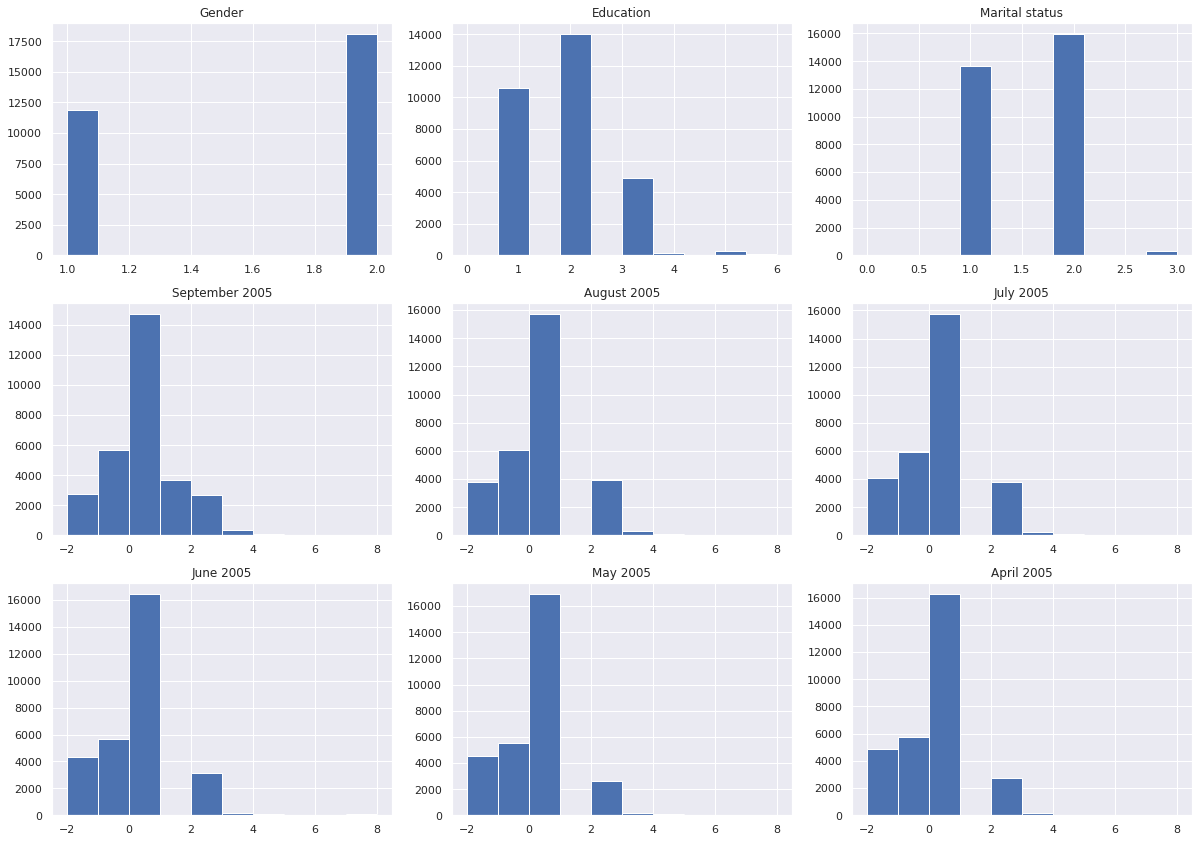

In [50]:
import seaborn as sns
import matplotlib.pyplot as plt 

sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(3,3)
fig.tight_layout(pad=2.0)
plt.subplot(3,3,1) 
plt.title('Gender')
plt.hist(processedDataFrame['X2'])
plt.subplot(3,3,2) 
plt.title('Education')
plt.hist(processedDataFrame['X3'])
plt.subplot(3,3,3) 
plt.title('Marital status')
plt.hist(processedDataFrame['X4'])
plt.subplot(3,3,4) 
plt.title('September 2005')
plt.hist(processedDataFrame['X6'])
plt.subplot(3,3,5) 
plt.title('August 2005')
plt.hist(processedDataFrame['X7'])
plt.subplot(3,3,6) 
plt.title('July 2005')
plt.hist(processedDataFrame['X8'])
plt.subplot(3,3,7) 
plt.title('June 2005')
plt.hist(processedDataFrame['X9'])
plt.subplot(3,3,8) 
plt.title('May 2005')
plt.hist(processedDataFrame['X10'])
plt.subplot(3,3,9) 
plt.title('April 2005')
plt.hist(processedDataFrame['X11'])
plt.show()

### <b><font color="darkpurple">Punto 6 - Escala los datos, si consideras necesario</font></b>

Considero que los siguientes features se deberiane escalar (los features categoricos no los escalaria, creo que onehot econding es lo apropiado para ellas)
<br><br>
<b>X1:</b>  Amount of the given credit (NT dollar): it includes both the individual consumer credit and his/her family (supplementary) credit. <br> 
<b>X5:</b>  Age (year) <br>
<b>X12-X17:</b>  Amount of bill statement (NT dollar). X12 = amount of bill statement in September, 2005; X13 = amount of bill statement in August, 2005; . . .; X17 = amount of bill statement in April, 2005. <br> 
<b>X18-X23:</b>  Amount of previous payment (NT dollar). X18 = amount paid in September, 2005; X19 = amount paid in August, 2005; . . .;X23 = amount paid in April, 2005. 



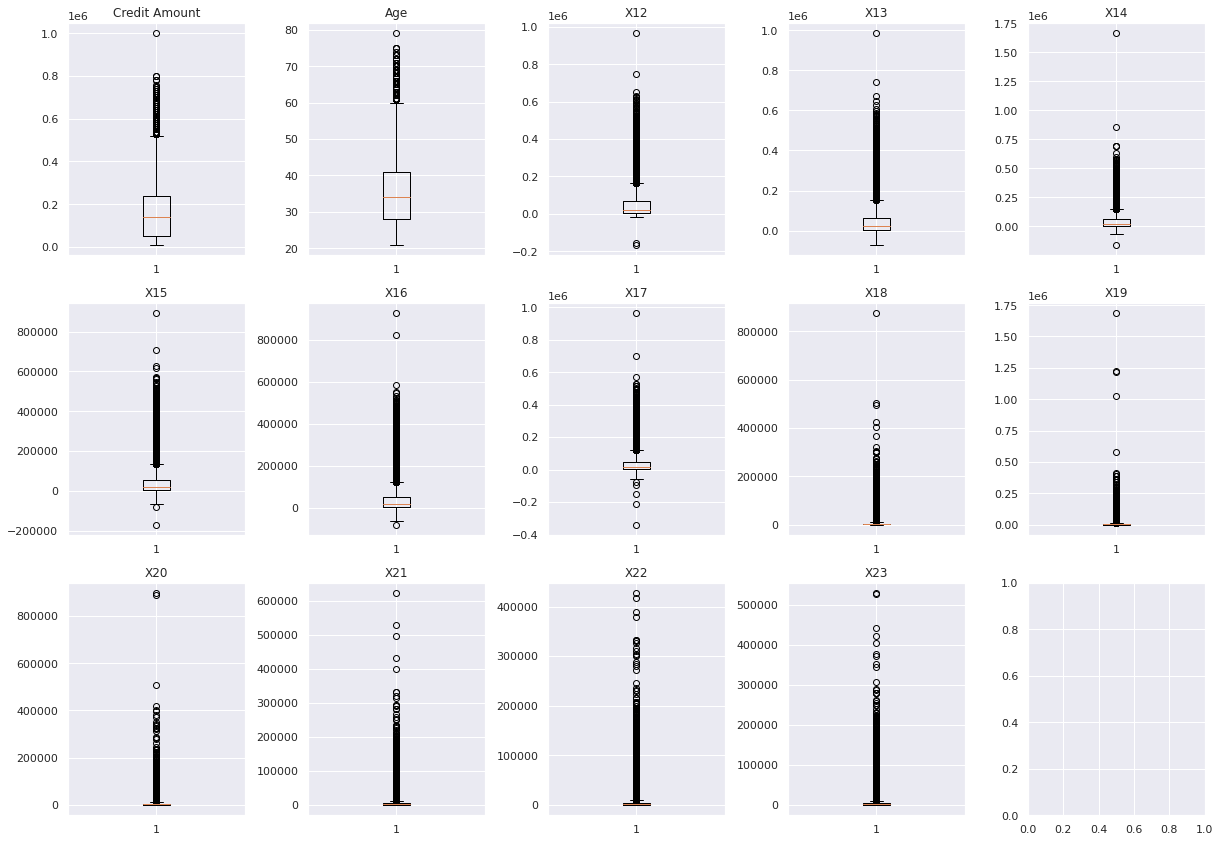

In [60]:
#before scaling
sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(3,5)
fig.tight_layout(pad=2.0)
plt.subplot(3,5,1) 
plt.title('Credit Amount')
plt.boxplot(processedDataFrame['X1'])
plt.subplot(3,5,2) 
plt.title('Age')
plt.boxplot(processedDataFrame['X5'])
plt.subplot(3,5,3) 
plt.title('X12')
plt.boxplot(processedDataFrame['X12'])
plt.subplot(3,5,4) 
plt.title('X13')
plt.boxplot(processedDataFrame['X13'])
plt.subplot(3,5,5) 
plt.title('X14')
plt.boxplot(processedDataFrame['X14'])
plt.subplot(3,5,6) 
plt.title('X15')
plt.boxplot(processedDataFrame['X15'])
plt.subplot(3,5,7) 
plt.title('X16')
plt.boxplot(processedDataFrame['X16'])
plt.subplot(3,5,8) 
plt.title('X17')
plt.boxplot(processedDataFrame['X17'])
plt.subplot(3,5,9) 
plt.title('X18')
plt.boxplot(processedDataFrame['X18'])
plt.subplot(3,5,10) 
plt.title('X19')
plt.boxplot(processedDataFrame['X19'])
plt.subplot(3,5,11) 
plt.title('X20')
plt.boxplot(processedDataFrame['X20'])
plt.subplot(3,5,12) 
plt.title('X21')
plt.boxplot(processedDataFrame['X21'])
plt.subplot(3,5,13) 
plt.title('X22')
plt.boxplot(processedDataFrame['X22'])
plt.subplot(3,5,14) 
plt.title('X23')
plt.boxplot(processedDataFrame['X23'])
plt.show()

In [66]:
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
  
# Crear instancia de min max scaler
scaler = MinMaxScaler(feature_range=(1,2))
#scaler = StandardScaler()
  
# escalar columnas
processedDataFrame[["X1"]] = scaler.fit_transform(processedDataFrame[["X1"]])
processedDataFrame[["X5"]] = scaler.fit_transform(processedDataFrame[["X5"]])
processedDataFrame[["X12"]] = scaler.fit_transform(processedDataFrame[["X12"]])
processedDataFrame[["X13"]] = scaler.fit_transform(processedDataFrame[["X13"]])
processedDataFrame[["X14"]] = scaler.fit_transform(processedDataFrame[["X14"]])
processedDataFrame[["X15"]] = scaler.fit_transform(processedDataFrame[["X15"]])
processedDataFrame[["X16"]] = scaler.fit_transform(processedDataFrame[["X16"]])
processedDataFrame[["X17"]] = scaler.fit_transform(processedDataFrame[["X17"]])
processedDataFrame[["X18"]] = scaler.fit_transform(processedDataFrame[["X18"]])
processedDataFrame[["X19"]] = scaler.fit_transform(processedDataFrame[["X19"]])
processedDataFrame[["X20"]] = scaler.fit_transform(processedDataFrame[["X20"]])
processedDataFrame[["X21"]] = scaler.fit_transform(processedDataFrame[["X21"]])
processedDataFrame[["X22"]] = scaler.fit_transform(processedDataFrame[["X22"]])
processedDataFrame[["X23"]] = scaler.fit_transform(processedDataFrame[["X23"]])
  


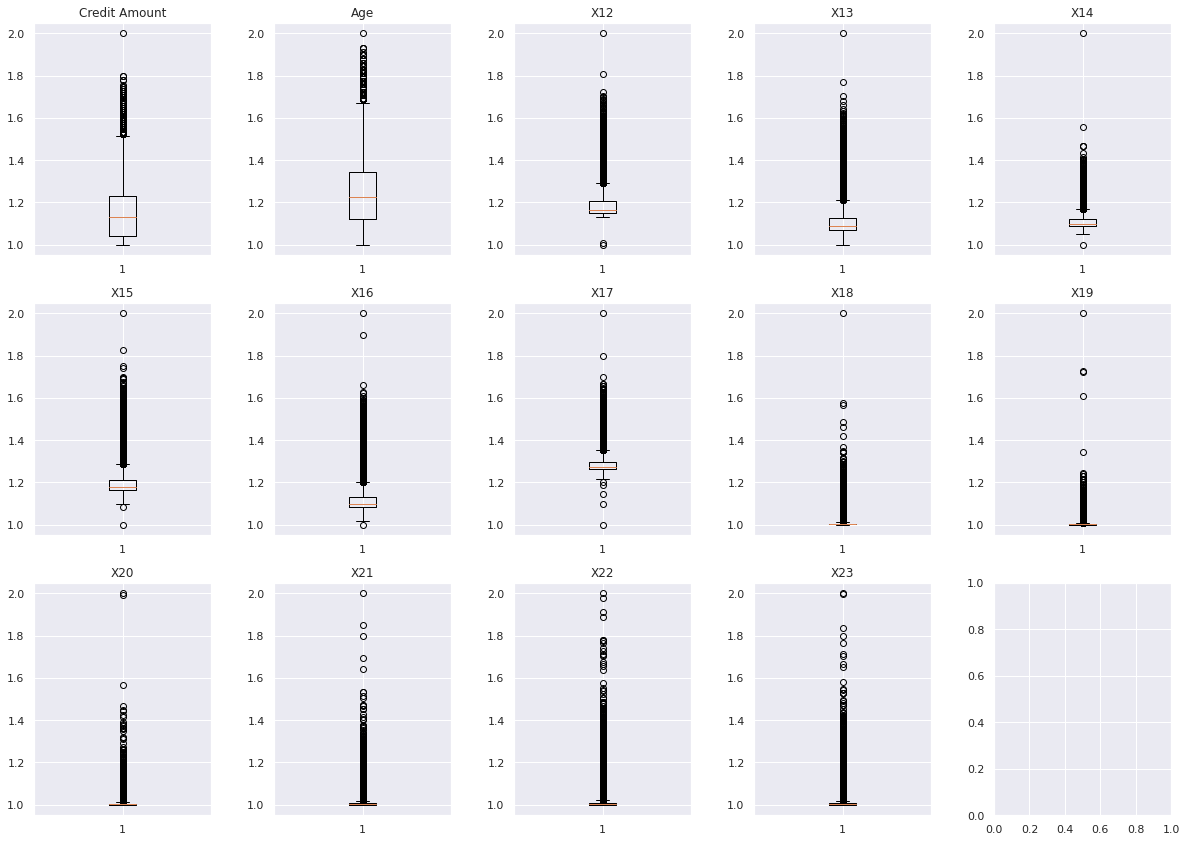

In [67]:
sns.set(rc={'figure.figsize':(17,12)})
fig, axes = plt.subplots(3,5)
fig.tight_layout(pad=2.0)
plt.subplot(3,5,1) 
plt.title('Credit Amount')
plt.boxplot(processedDataFrame['X1'])
plt.subplot(3,5,2) 
plt.title('Age')
plt.boxplot(processedDataFrame['X5'])
plt.subplot(3,5,3) 
plt.title('X12')
plt.boxplot(processedDataFrame['X12'])
plt.subplot(3,5,4) 
plt.title('X13')
plt.boxplot(processedDataFrame['X13'])
plt.subplot(3,5,5) 
plt.title('X14')
plt.boxplot(processedDataFrame['X14'])
plt.subplot(3,5,6) 
plt.title('X15')
plt.boxplot(processedDataFrame['X15'])
plt.subplot(3,5,7) 
plt.title('X16')
plt.boxplot(processedDataFrame['X16'])
plt.subplot(3,5,8) 
plt.title('X17')
plt.boxplot(processedDataFrame['X17'])
plt.subplot(3,5,9) 
plt.title('X18')
plt.boxplot(processedDataFrame['X18'])
plt.subplot(3,5,10) 
plt.title('X19')
plt.boxplot(processedDataFrame['X19'])
plt.subplot(3,5,11) 
plt.title('X20')
plt.boxplot(processedDataFrame['X20'])
plt.subplot(3,5,12) 
plt.title('X21')
plt.boxplot(processedDataFrame['X21'])
plt.subplot(3,5,13) 
plt.title('X22')
plt.boxplot(processedDataFrame['X22'])
plt.subplot(3,5,14) 
plt.title('X23')
plt.boxplot(processedDataFrame['X23'])
plt.show()
#Grafica despues de escalar datos numericos continuos

### <b><font color="darkpurple">Punto 7 - Reduce las dimensiones con PCA</font></b>


In [70]:

from sklearn.decomposition import PCA
#seleccionar solamente las columnas de nuestro dataframe,excluir varibale de salida el ID del row
featuresDataFrame = processedDataFrame.loc[:, 'X1':'X23']
featuresDataFrame.head(3)

,X1,X2,X3,X4,X5,X6,X7,X8,X9,X10,...,X14,X15,X16,X17,X18,X19,X20,X21,X22,X23
0,1.010101,2.0,2.0,1.0,1.051724,2.0,2.0,-1.0,-1.0,-2.0,...,1.086723,1.160138,1.080648,1.260979,1.000000,1.000409,1.000000,1.00000,1.000000,1.000000
1,1.111111,2.0,2.0,2.0,1.086207,-1.0,2.0,0.0,0.0,0.0,...,1.087817,1.163220,1.084074,1.263485,1.000000,1.000594,1.001116,1.00161,1.000000,1.003783
2,1.080808,2.0,2.0,2.0,1.224138,0.0,0.0,0.0,0.0,0.0,...,1.093789,1.173637,1.095470,1.272928,1.001738,1.000891,1.001116,1.00161,1.002345,1.009458


In [71]:
# Definr nuestro PCA 
pca = PCA(n_components=3) # intentemos con 3 componentes principales para nuestra primera aproximacion
pcaGenerated = pca.fit_transform(featuresDataFrame)


print('processedDataFrame - Número Original de features ',featuresDataFrame.shape)
print('pcaGenerated - Número de componentes una vez aplicado PCA ',pcaGenerated.shape)

processedDataFrame - Número Original de features  (29997, 23)
pcaGenerated - Número de componentes una vez aplicado PCA  (29997, 3)


In [72]:
print(pca.explained_variance_ratio_)
#varianza otorgada por PC1, PC2, PC3

[0.62740866 0.0993885  0.06710397]


In [74]:
print(pca.explained_variance_ratio_.sum())

0.793901125739439


Tres componentes conservan el 0.79 de la varianza, validemos cual seria la diferencia con 2 componentes.

In [75]:
# Definr nuestro PCA 
pca = PCA(n_components=2) # intentemos con 2 componentes principales para nuestra segunda aproximacion
pcaGenerated = pca.fit_transform(featuresDataFrame)


print('processedDataFrame - Número Original de features ',featuresDataFrame.shape)
print('pcaGenerated - Número de componentes una vez aplicado PCA ',pcaGenerated.shape)

processedDataFrame - Número Original de features  (29997, 23)
pcaGenerated - Número de componentes una vez aplicado PCA  (29997, 2)


In [76]:
print(pca.explained_variance_ratio_)
#varianza otorgada por PC1, PC2

[0.62740866 0.0993885 ]


In [77]:
print(pca.explained_variance_ratio_.sum())

0.7267971593126046


Dos componentes son suficientes para la exploracion de la varianza (> 70%), pero creo que 3 componentes otrgan un incremento significativo en la varianza, por lo cual creo que sería útil toamr 3 componentes en lugar de dos